In [1]:
!pip install scikeras

In [2]:
import pickle
import pandas as pd
import numpy as np
import scikeras
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier

from sklearn.datasets import make_classification

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv")

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**1. Data Preparation & Cleaning (EDA)**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


OneHot features: The Rest
Label Encoding: Yes and No

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<ipython-input-8-91afe69aac02>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [9]:
# Converting the TotalCharges column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'].fillna(0, inplace=True)

In [10]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
# Dropping irrelevant columns
df = df.drop(columns=['customerID'], axis=1)
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
# Extracting the numeric and data
numeric = df.select_dtypes(include=['number'])
numeric

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


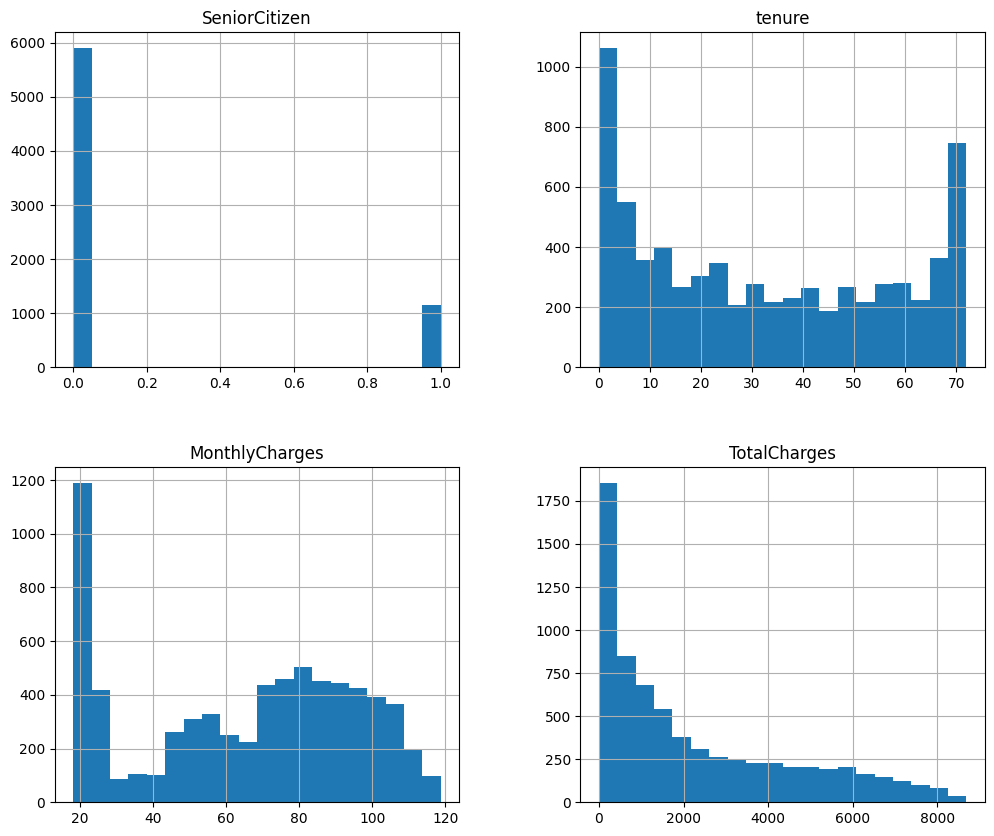

In [14]:
# Distribution of Numeric Variables
numeric.hist(figsize=(12, 10), bins=20)
plt.show()

In [15]:
# Extracting the numeric and data
categorical = df.select_dtypes(include=['object'])
categorical

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [16]:
#Label Encoding
label_encoding_features = categorical[['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']]
# label_encoding_features = categorical

label_encoders = {}

label_encoded_df = pd.DataFrame()

for col in label_encoding_features.columns:
    label_encoders[col] = LabelEncoder()
    label_encoded_df[col] = label_encoders[col].fit_transform(label_encoding_features[col])

print(label_encoded_df)

      gender  Partner  Dependents  PhoneService  PaperlessBilling  Churn
0          0        1           0             0                 1      0
1          1        0           0             1                 0      0
2          1        0           0             1                 1      1
3          1        0           0             0                 0      0
4          0        0           0             1                 1      1
...      ...      ...         ...           ...               ...    ...
7038       1        1           1             1                 1      0
7039       0        1           1             1                 1      0
7040       0        1           1             0                 1      0
7041       1        1           0             1                 1      1
7042       1        0           0             1                 1      0

[7043 rows x 6 columns]


In [17]:
# One Hot Encoding
one_hot_features = categorical[['MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']]

# one_hot_features = categorical.drop('Churn', axis=1)

one_hot_df = pd.get_dummies(one_hot_features, columns=one_hot_features.columns)

print(one_hot_df)

      MultipleLines_No  MultipleLines_No phone service  MultipleLines_Yes  \
0                    0                               1                  0   
1                    1                               0                  0   
2                    1                               0                  0   
3                    0                               1                  0   
4                    1                               0                  0   
...                ...                             ...                ...   
7038                 0                               0                  1   
7039                 0                               0                  1   
7040                 0                               1                  0   
7041                 0                               0                  1   
7042                 1                               0                  0   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No 

In [18]:
new_df = pd.concat([numeric, label_encoded_df, one_hot_df], axis=1)
# new_df = pd.concat([numeric, label_encoded_df], axis=1)
# new_df = pd.concat([numeric, one_hot_df], axis=1)

In [19]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   gender                                   7043 non-null   int64  
 5   Partner                                  7043 non-null   int64  
 6   Dependents                               7043 non-null   int64  
 7   PhoneService                             7043 non-null   int64  
 8   PaperlessBilling                         7043 non-null   int64  
 9   Churn                                    7043 non-null   int64  
 10  MultipleLines_No                         7043 no

**2. Feature Selection & Importance**

In [20]:
# Scaling the features for training and testing
scaler = StandardScaler()
X_data = new_df.drop('Churn', axis=1)
X_scaled = scaler.fit_transform(X_data)
X_scaled = pd.DataFrame(X_scaled, columns=X_data.columns)
print(X_scaled)

      SeniorCitizen    tenure  MonthlyCharges  TotalCharges    gender  \
0         -0.439916 -1.277445       -1.160323     -0.992611 -1.009559   
1         -0.439916  0.066327       -0.259629     -0.172165  0.990532   
2         -0.439916 -1.236724       -0.362660     -0.958066  0.990532   
3         -0.439916  0.514251       -0.746535     -0.193672  0.990532   
4         -0.439916 -1.236724        0.197365     -0.938874 -1.009559   
...             ...       ...             ...           ...       ...   
7038      -0.439916 -0.340876        0.665992     -0.127605  0.990532   
7039      -0.439916  1.613701        1.277533      2.242606 -1.009559   
7040      -0.439916 -0.870241       -1.168632     -0.852932 -1.009559   
7041       2.273159 -1.155283        0.320338     -0.870513  0.990532   
7042      -0.439916  1.369379        1.358961      2.013897  0.990532   

       Partner  Dependents  PhoneService  PaperlessBilling  MultipleLines_No  \
0     1.034530   -0.654012     -3.054010   

In [21]:
#Splitting the data for Feature Selection
X = X_scaled
y = new_df['Churn']

In [22]:
# Using Random Forest Classifier for Feature Selection
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                                    Feature  Importance
3                              TotalCharges    0.172225
2                            MonthlyCharges    0.150086
1                                    tenure    0.145882
33                  Contract_Month-to-month    0.053975
38           PaymentMethod_Electronic check    0.032772
4                                    gender    0.027971
13              InternetService_Fiber optic    0.026720
15                        OnlineSecurity_No    0.026479
8                          PaperlessBilling    0.024744
24                           TechSupport_No    0.024655
5                                   Partner    0.023737
0                             SeniorCitizen    0.021140
6                                Dependents    0.018693
35                        Contract_Two year    0.018454
18                          OnlineBackup_No    0.016666
21                      DeviceProtection_No    0.016558
9                          MultipleLines_No    0

In [23]:
# Features and Importance scores
features = feature_importance_df['Feature']
importance_scores = feature_importance_df['Importance']

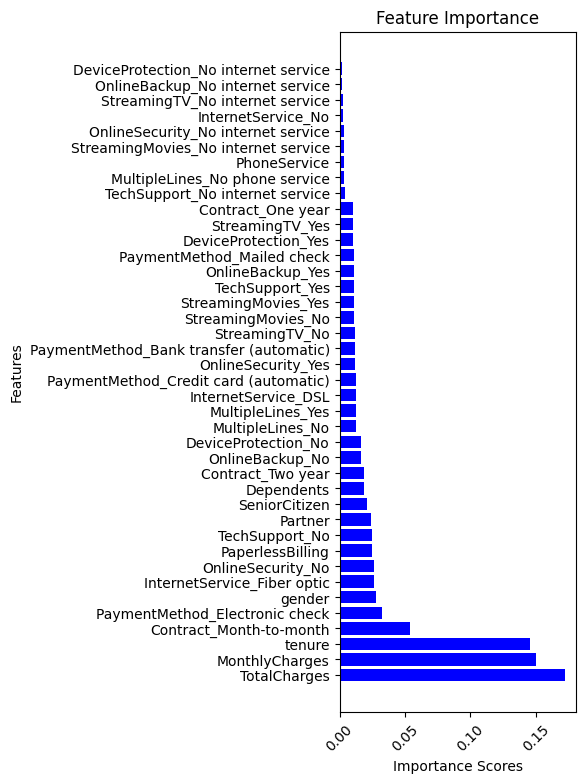

In [24]:
# Create a bar plot for all feature importances
plt.figure(figsize=(6, 8))
plt.barh(features, importance_scores, color='blue')
plt.xlabel('Importance Scores')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [25]:
# Distribution of Churn
import plotly.express as px

target = new_df["Churn"].value_counts().to_frame().reset_index()
target = target.rename(columns={'index': 'Category', 'Churn': 'Count'})

fig = px.pie(target, values='Count', names='Category', color_discrete_sequence=["blue", "red"],
             title='Distribution of Churn')

fig.show()


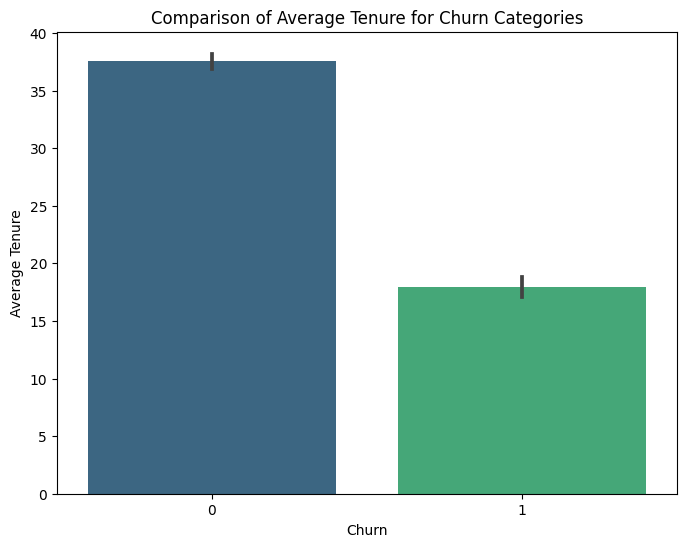

In [26]:
# Average Tenure by Churn
plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='tenure', data=new_df, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Average Tenure')
plt.title('Comparison of Average Tenure for Churn Categories')
plt.show()

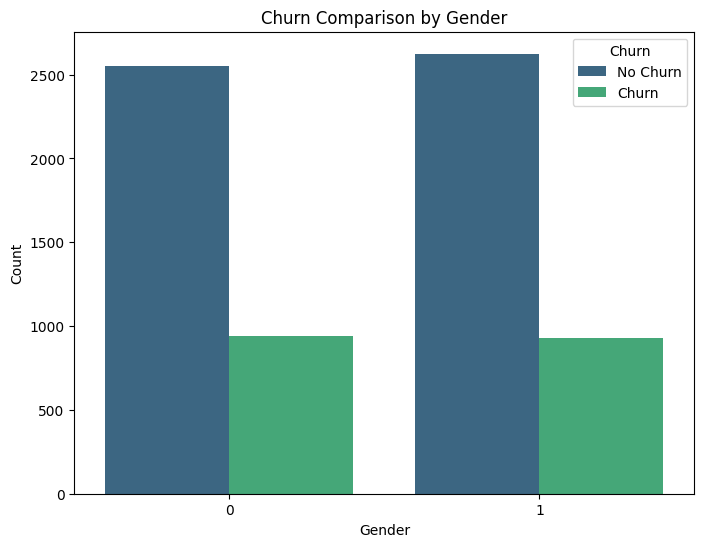

In [27]:
# Gender Distribution of Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=new_df, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Comparison by Gender')
plt.legend(title='Churn', loc='upper right', labels=['No Churn', 'Churn'])
plt.show()

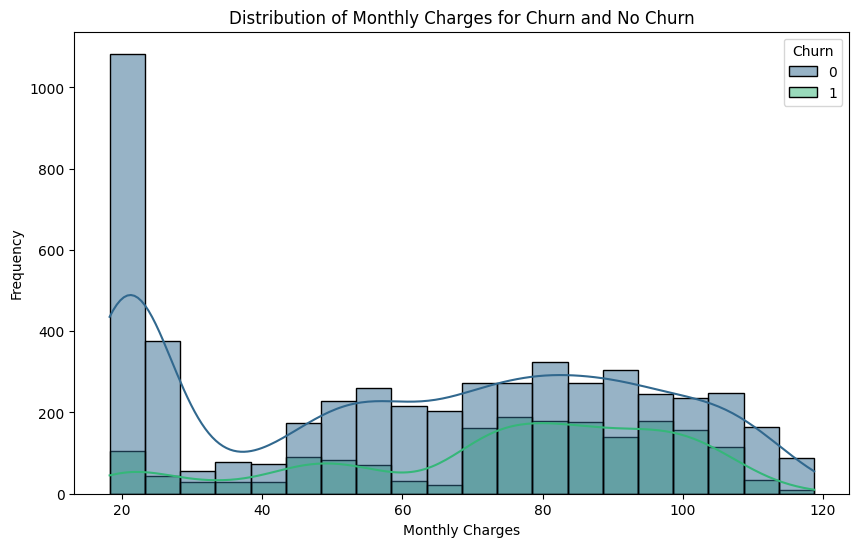

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(data=new_df, x='MonthlyCharges', hue='Churn', bins=20, kde=True, palette='viridis')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges for Churn and No Churn')
plt.show()

In [29]:
# Filter out columns with importance less than 0.010
selected_features = feature_importance_df[feature_importance_df['Importance'] >= 0.02]['Feature'].tolist()
print(len(selected_features))
print(selected_features)

12
['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract_Month-to-month', 'PaymentMethod_Electronic check', 'gender', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'PaperlessBilling', 'TechSupport_No', 'Partner', 'SeniorCitizen']


**3. Training the Multi-Layer Perceptron**

In [30]:
sc = StandardScaler()
X_data = pd.DataFrame(new_df[selected_features], columns = selected_features)
X = sc.fit_transform(X_data)
y = new_df['Churn']

In [31]:
print(X)

[[-0.99261052 -1.16032292 -1.27744458 ...  1.0138687   1.03453023
  -0.43991649]
 [-0.17216471 -0.25962894  0.06632742 ...  1.0138687  -0.96662231
  -0.43991649]
 [-0.9580659  -0.36266036 -1.23672422 ...  1.0138687  -0.96662231
  -0.43991649]
 ...
 [-0.85293201 -1.1686319  -0.87024095 ...  1.0138687   1.03453023
  -0.43991649]
 [-0.87051315  0.32033821 -1.15528349 ...  1.0138687   1.03453023
   2.27315869]
 [ 2.01389665  1.35896134  1.36937906 ... -0.98632101 -0.96662231
  -0.43991649]]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and save the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
177/177 [==============================] - 1s 4ms/step - loss: 0.7609 - accuracy: 0.3939 - val_loss: 0.6788 - val_accuracy: 0.5756
Epoch 2/100
177/177 [==============================] - 0s 3ms/step - loss: 0.6268 - accuracy: 0.7020 - val_loss: 0.5810 - val_accuracy: 0.7516
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5483 - accuracy: 0.7632 - val_loss: 0.5139 - val_accuracy: 0.7679
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4968 - accuracy: 0.7767 - val_loss: 0.4704 - val_accuracy: 0.7842
Epoch 5/100
177/177 [==============================] - 1s 6ms/step - loss: 0.4677 - accuracy: 0.7808 - val_loss: 0.4469 - val_accuracy: 0.7885
Epoch 6/100
177/177 [==============================] - 2s 9ms/step - loss: 0.4525 - accuracy: 0.7856 - val_loss: 0.4341 - val_accuracy: 0.7913
Epoch 7/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4450 - accuracy: 0.7881 - val_loss: 0.4274 - val_accuracy: 0.7956

In [34]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100

177/177 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8085


80.84841966629028

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

45/45 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8133
Test Loss: 0.4014
Test Accuracy: 81.3343


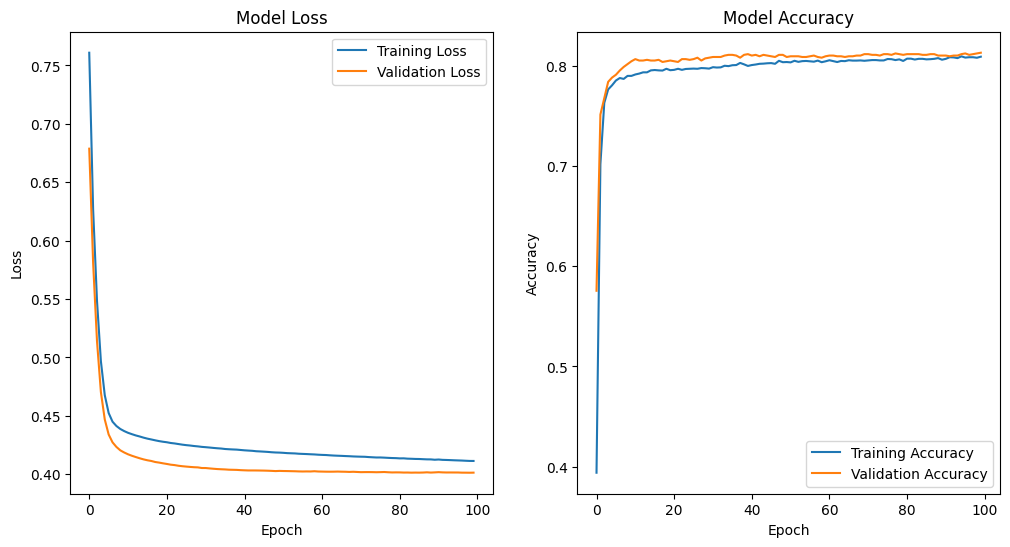

In [36]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [37]:
# Predictions on the test set
y_pred = model.predict(X_test)

# Threshold predictions for binary classification
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred_binary)
auc_score = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("AUC Score:", auc_score)

45/45 [==============================] - 0s 995us/step
Accuracy: 0.8133427963094393
AUC Score: 0.8584328775347542


# **5.GridSearchCV and Cross-Validation**

---



In [38]:
# Define the MLP model using the Functional API
def create_mlp_model(hidden_layer_sizes=(100,), activation='relu', solver='adam'):
    inputs = Input(shape=(X_train.shape[1],))
    x = Dense(hidden_layer_sizes[0], activation=activation)(inputs)
    for units in hidden_layer_sizes[1:]:
        x = Dense(units, activation=activation)(x)
    outputs = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=solver, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the MLP model
mlp_model = MLPClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
}

# Create GridSearchCV object
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_model = MLPClassifier(**best_params)
best_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("AUC Score:", auc_score)


Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'solver': 'sgd'}
Accuracy: 0.8105039034776437
AUC Score: 0.8581922117444907


In [41]:
import pickle
# Specifying the file name for scaler
pickle_filename = "best_churn_model.pkl"

# Saving the scaler to the file
with open(pickle_filename, 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [42]:
# Specifying the file name for scaler
pickle_filename = "scaler.pkl"

# Saving the scaler to the file
with open(pickle_filename, 'wb') as model_file:
    pickle.dump(sc, model_file)